### Computational Physics
## Random Number Generators

<img src="http://www.idquantique.com/wordpress/wp-content/uploads/Quantis-Appliance-Side-v2-Cropped.jpg" width=600px>

http://www.idquantique.com/random-number-generation/

### kM  Computational Physics
## Random Number Generators

<img src="http://www.idquantique.com/wordpress/wp-content/uploads/Quantis-Appliance-Side-v2-Cropped.jpg" width=600px>

http://www.idquantique.com/random-number-generation/

## Last Time

- Error scaling for high dimensional quadrature
- Monte Carlo Integration

## Today

- Generation and testing of pseudorandom numbers
- Tower sampling


## Setting up the Notebook

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('../include/notebook.mplstyle');
%config InlineBackend.figure_format = 'retina'
colors = ["#2078B5", "#FF7F0F", "#2CA12C", "#D72827", "#9467BE", "#8C574B",
            "#E478C2", "#808080", "#BCBE20", "#17BED0", "#AEC8E9", "#FFBC79", 
            "#98E08B", "#FF9896", "#C6B1D6", "#C59D94", "#F8B7D3", "#C8C8C8", 
           "#DCDC8E", "#9EDAE6"]

## Generation of Random Numbers

### What is a random number?

- There is really no such thing, definitely not on a deterministic classical computer
- Loose term applied to a sequence of independent numbers drawn randomly from some distribution
- Typically we select integer or real values on some finite domain

What of the simplest ways to generate uniformly distrubted random numbers on $[0,1]$ is the **Linear Congruential Generator** (LCG).

Consider the map (recursion relation) which generates integers between $0$ and $m-1$:

\begin{equation}
X_{n+1} = (a X_n + c) \mod m
\end{equation}

where $a$ is known as the multiplier, $c$ is the increment and $m$ the modulus.  Starting from an initial **seed** value $X_0$ we generate the list of numbers:

\begin{align*}
X_0 &= \text{seed} \newline
X_1 &= (a X_0 + c) \mod m \newline
X_2 &= \{a [a (X_0 + c) \mod m] + c\} \mod m \newline
\vdots &
\end{align*}

Then, a uniform number $x_n \in \mathcal{U}_{[0,1]}$ can be computed as:

\begin{equation}
x_n = \frac{X_n}{m} .
\end{equation}




<div class="span alert alert-success">
<h2>Programming challenge </h2>
Write a LCG function with $a=16807$, $c=0$, $m=2^{31}-1$ and $seed=332$ that generates a list of *pseudorandom* uniform numbers of length $N=1000$ on [0,1].
</div>

<!--
    m = 2**32-1
    a = 6
    c = 7
    U = 3
-->

In [2]:
def lcg_rand(a,c,m,seed,N):
    '''A linear congruential pseudrandom number generator'''
    X = np.zeros([N])
    X[0] = seed
    for n in range(1, N):
        X[n] = (((X[n-1] * a) + c) % m)
    x = X / m
    return x 

a = 16807 
c = 0 
m = 2**31 -1 
seed = 332 
N = 1000 

x = lcg_rand(a,c,m,seed,N)

print(x)


[1.54599547e-07 2.59835459e-03 6.70545664e-01 8.60966969e-01
 2.71843799e-01 8.78722821e-01 6.94449861e-01 6.18812583e-01
 3.83086000e-01 5.26406738e-01 3.18041452e-01 3.22689727e-01
 4.46235527e-01 8.80494909e-01 4.77940695e-01 7.49262835e-01
 8.60464187e-01 8.21595514e-01 5.55797822e-01 2.93996051e-01
 1.91622856e-01 6.05343520e-01 8.54050368e-03 5.40245428e-01
 9.04916250e-01 9.27407649e-01 9.40354159e-01 5.32343732e-01
 1.01095483e-01 1.11786475e-01 7.95277356e-01 2.26515723e-01
 4.97491756e-02 1.34393897e-01 7.58218551e-01 3.79185682e-01
 9.73763075e-01 3.60045387e-02 1.28281336e-01 2.44119973e-02
 2.92438681e-01 1.69100193e-02 2.06695023e-01 9.23253057e-01
 1.14137215e-01 3.04166818e-01 1.31713139e-01 7.02726410e-01
 7.22766687e-01 5.39708966e-01 8.88586676e-01 4.76266255e-01
 6.06945982e-01 9.41111981e-01 2.69070981e-01 2.75973130e-01
 2.80390538e-01 5.23771160e-01 2.18871357e-02 8.57089746e-01
 1.07356746e-01 3.44826656e-01 5.01601055e-01 4.08931929e-01
 9.18936466e-01 5.651811

We can test for uniformity by examining a histogram

Text(0, 0.5, 'p(x)')

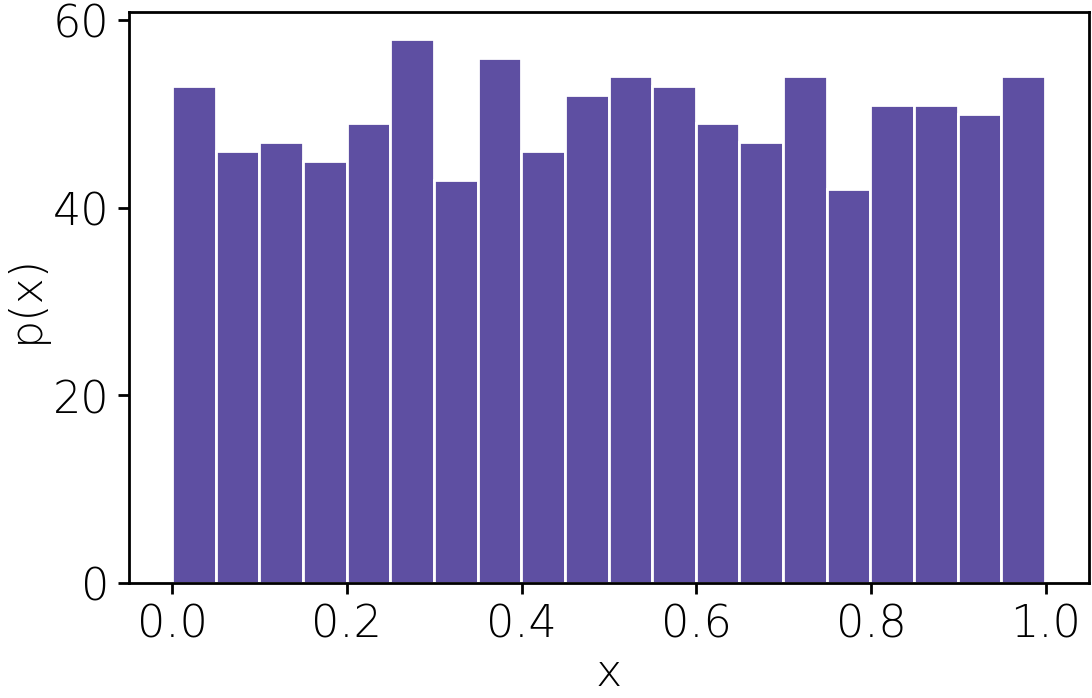

In [3]:
# the histogram of the data
n, bins, patches = plt.hist(x, 20, ec='w') # deleted "normed = 1"
plt.xlabel('x')
plt.ylabel('p(x)')

## Optimal Values for the LCG

1. $c$ is relatively prime to m
2. $b=a-1$ is a multiple of $p$ for every prime number $p$ dividing $m$
3. $b$ is a multiple of 4 if $m$ is a multiple of 4

Numerical Recipes suggests:

\begin{align*}
a &= 1664525 \newline
c &= 1013904223 \newline
m &= 2^{32}
\end{align*}

We can also test the overall statistics (but not correlations) by looking at the mean and variance over the uniform probability distribution $p(x) = 1$.

\begin{equation}
\langle x \rangle = \mu = \int_0^1 p(x) x dx 
= \int_0^1 x dx 
= \left. \frac{x^2}{2}\right \rvert_0^1 
= \frac{1}{2}
\end{equation}

\begin{equation}
\sigma^2 = \langle(x-\mu)^2\rangle = \int_0^1 \left(x-\frac{1}{2}\right)^2 dx =  \int_0^1 \left(x^2 - x +\frac{1}{4}\right) dx
= \frac{1}{3} - \frac{1}{2} + \frac{1}{4} = \frac{1}{12}
\end{equation}

so $\sigma = \frac{1}{\sqrt{12}} \simeq 0.2886$

In [4]:
a,c,m,seed = 1664525,1013904223,2**32,13523
x = lcg_rand(a,c,m,seed,10000)

print(np.average(x),np.std(x))

0.5044933480804786 0.28906285473628607


We can also visually inspect for correlations by plotting $x_i vs. x_{i+1}$

Text(0, 0.5, '$x_{i+1}$')

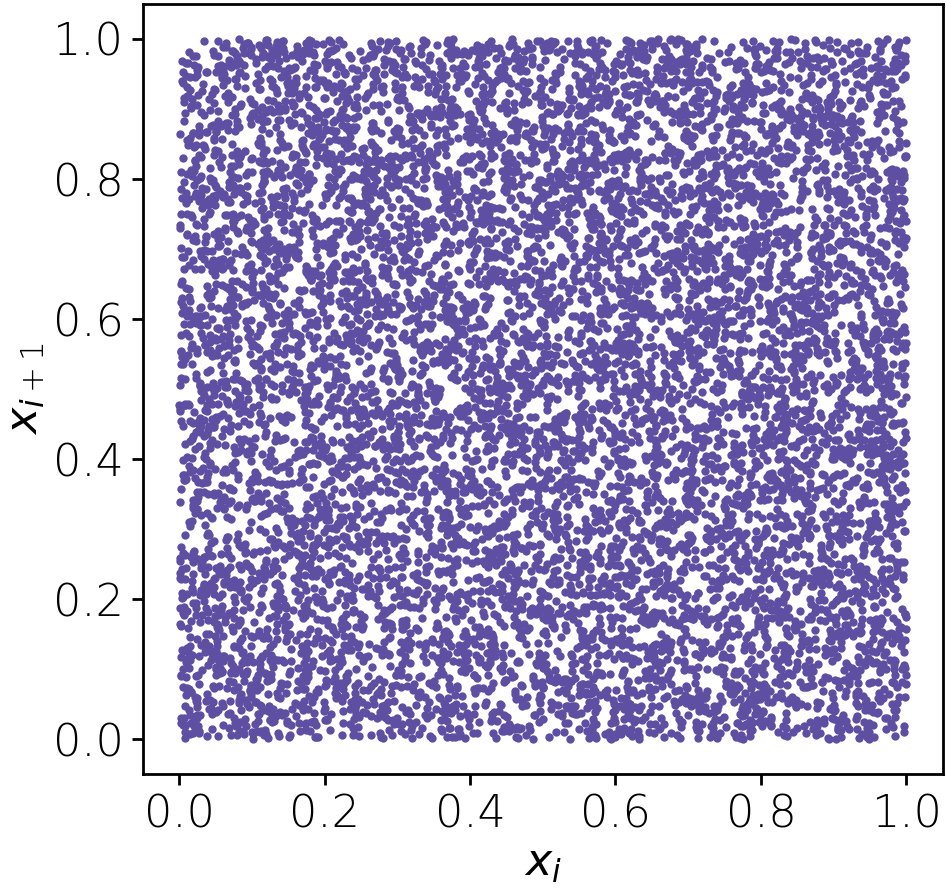

In [5]:
plt.figure(figsize=(5,5))
plt.plot(x[:-1],x[1:],'o', ms=3, mew=0)
plt.xlabel(r'$x_i$')
plt.ylabel(r'$x_{i+1}$')

## Tower Sampling

We can use the uniform distribution of (pseudo) random numbers in many ways, including sampling $N$ discrete events, each with their own probabilities $p_0,p_1,\ldots,p_{N-1}$.  Since something *must* happen, we know

\begin{equation}
\sum_{i=0}^{n-1} p_i = 1
\end{equation}

We can use our uniformly distributed random numbers $x\in \mathcal{U}_{[0,1]}$ to sample this discrete distribution by exploiting the fact that each event occupies a width $p_i$ in the probability interval. i.e. for a given random number $x$:

\begin{align*}
0 &\leftarrow 0 \le x < p_0 \newline
1 &\leftarrow p_0 \le x < p_0 + p_1 \newline
2 &\leftarrow p_0 + p_1 \le x < p_0 + p_1 + p_2 \newline
&\vdots \newline
N-1 &\leftarrow p_0 + \cdots + p_{N-2} \le x < 1 .
\end{align*}

Note that the relevant quantity here is the **cumulative probability**:

\begin{equation}
{P}_i = \sum_{k=0}^i p_k
\end{equation}

which for continuous distribution is:

\begin{equation}
{P}(x) = \int_{-\infty}^x p(x) dx
\end{equation}

In practice, we simply make a list of cumulative probabilites and figure out where to insert $x$.

Text(0.5, 1.0, 'Cumulative Probability Distribution')

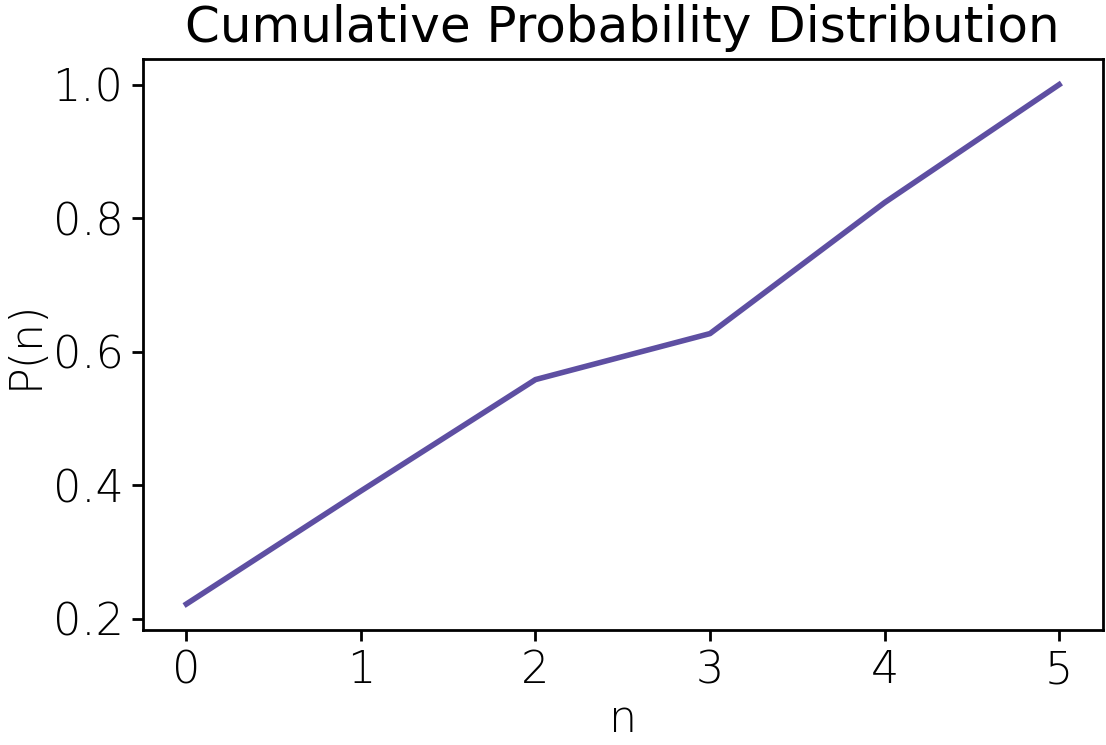

In [6]:
# Suppose we have 6 outcomes (eg. an unfair die) with the following propbabilites
p = [0.22181816, 0.16939565, 0.16688735, 0.06891783, 0.19622408, 0.17675693]

# generate the CDF
P = [np.sum(p[:i+1]) for i in range(len(p))]

plt.plot(P)
plt.xlabel('n')
plt.ylabel('P(n)')
plt.title('Cumulative Probability Distribution')

In [7]:
P

[0.22181816, 0.39121381, 0.55810116, 0.6270189899999999, 0.82324307, 1.0]

Text(0.5, 1.0, 'Tower Sampling')

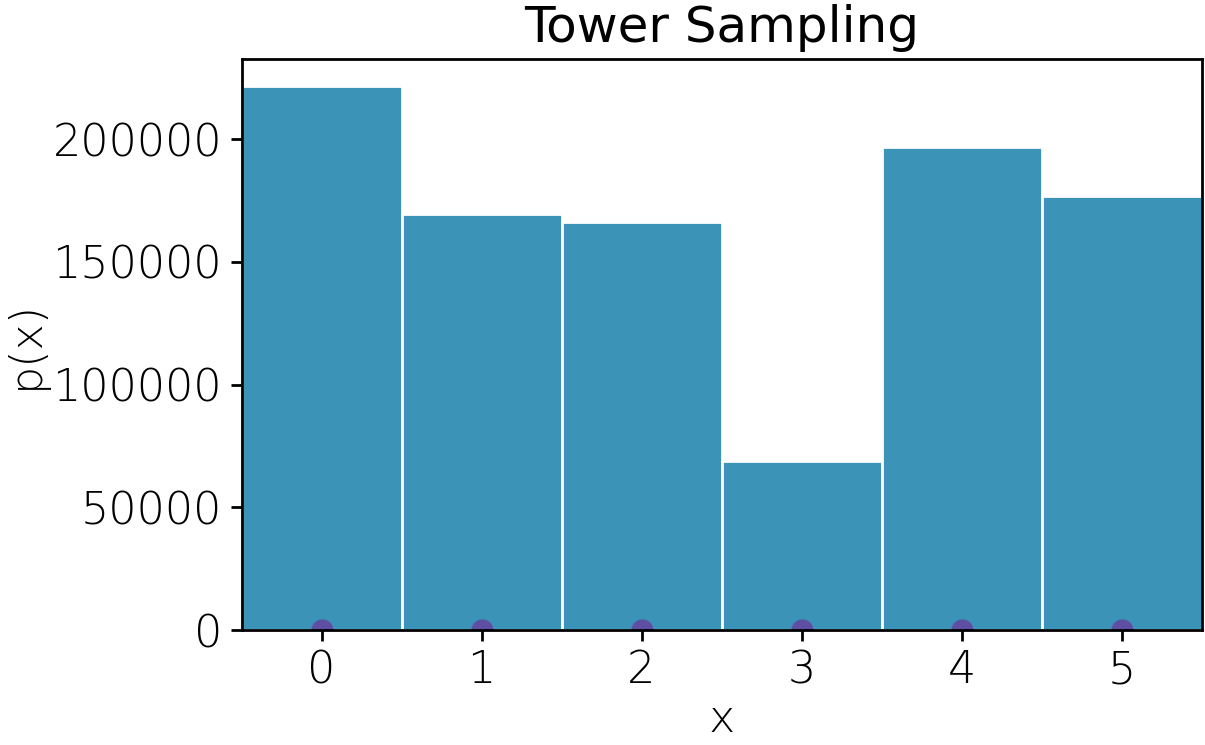

In [8]:
# Generate N random numbers sampled according to the tower, searchsorted is *fast*
N = 1000000
events = np.searchsorted(P,np.random.random(N))
plt.plot(p,'o', mec='None')
plt.hist(events, bins=len(p), range=(-0.5,len(p) - 0.5), ec='w')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.xlim(-0.5,5.5)
plt.title('Tower Sampling')

## Sampling Continous Distributions

We can extend the *tower sampling* concept to any continuous probability distribution. Our starting point will be the uniform distribution which satisfies:

\begin{equation}
p(x) dx = \left \{
\begin{array}[rcl]
{}dx & ; & 0 \le x \le 1 \\
0 & ; & \text{otherwise} 
\end{array}
\right.
\end{equation}

such that:

\begin{equation}
\int_{-\infty}^{\infty} p(x) dx = 1.
\end{equation}

Now, we want to sample some new random variables $y$ from some probability distribution $p(y)$.  This requires we identify a mapping $x\leftrightarrow y$ such that probability is conserved, i.e.

\begin{equation}
p(y) dy = p(x) dx \Rightarrow p(y) = \frac{dx}{dy}  p(x) .
\end{equation}

We can integrate both sides:

\begin{equation}
P(y) = \int_{-\infty}^y p(y') dy' = \int_{-\infty}^{y} \frac{dx}{dy'}  p(x) dy' = \int_0^y \frac{dx}{dy'} dy' = x(y)
\end{equation}

Therefore, if we can invert the CDF $P(y)$ we can get $y = P^{-1}(x)$ for a uniformly distributed $x$.

Let's see how this works for a few specific examples.


### Example 1
Generate a uniform random number $y$ on the domain $[a,b]$.

We have: 
\begin{equation}
p(y) = \left \{
\begin{array}[rcl]
{} \frac{1}{b-a} & ; & a \le y \le b \\
0 & ; & \text{otherwise} 
\end{array}
\right.
\end{equation}

So

\begin{equation}
x(y) =\int_a^y p(y') dy' = \int_a^y \frac{dy'}{b-a} = \left.\frac{y'}{b-a} \right \rvert_a^y = \frac{y-a}{b-a}
\end{equation}

so $y = (b-a)x + a$,  our well known result.

## Next Time:
What happens if we can't analytically invert $P(y)$?